In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
target_names = cancer.target_names

df = pd.DataFrame(data=cancer.data)
print(df.head())

      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  
0  0.4601  0.11890  
1 

In [44]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [45]:
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [39]:
# Print the mean and standard deviation of each feature
print("Mean of each feature:")
print(scaler.mean_)
print("\nStandard Deviation of each feature:")
print(scaler.scale_)

Mean of each feature:
[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]

Standard Deviation of each feature:
[3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]


In [18]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],'kernel': ['linear', 'rbf', 'poly']}


In [19]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)


In [20]:
pca = PCA(n_components=2)
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_search.fit(pca.fit_transform(X_scaled), y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [21]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [22]:
print("Best Params: ", best_params)

Best Params:  {'C': 1, 'kernel': 'linear'}


In [23]:
y_pred = best_model.predict(pca.transform(X_scaled))

In [24]:
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy with best model: {accuracy:.4f}")

Accuracy with best model: 0.9543


In [25]:
colors = ['red' if label == 0 else 'blue' for label in y]
markers = ['o' if kernel == 'linear' else '^' if kernel == 'rbf' else 'x' for kernel in best_params['kernel']]

In [40]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

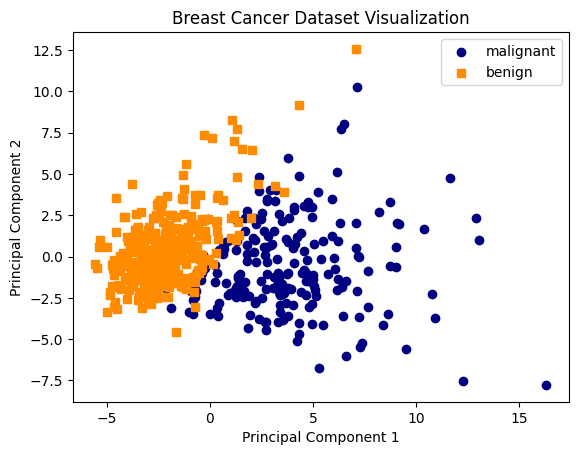

In [43]:
# Plot the transformed data
colors = ['navy', 'darkorange']
markers = ['o', 's']
for target, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], color=color, marker=marker, label=target_names[target])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Breast Cancer Dataset Visualization')
plt.legend(loc='upper right')
plt.show()

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = best_svm_classifier.predict(X_test_scaled)

In [33]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [35]:
confusion_matrix(best_svm_classifier, X_test_scaled, y_test, cmap=plt.cm.Blues, display_labels=data.target_names)
plt.title('Confusion Matrix')
plt.show()

TypeError: too many positional arguments